In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data_df=pd.read_csv(r'C:\Users\gagandeep.risam\Documents\bank\Bank_Personal_Loan_Modelling-1.csv')
data_df.head() # check for data load

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data_df.shape # check for row and columns

(5000, 14)

In [4]:
data_df.dtypes # Check type

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
data_df.nunique() #number of unique values

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [6]:
data_df.isnull().any() # check for missing values

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [7]:
data_df.describe().transpose() # check for wrong entries

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
# There is a typo error ZIP code value  9307
data_df[(data_df['ZIP Code']>93000)*(data_df['ZIP Code']<94000)].groupby('ZIP Code').count()['ID'] # check of possible option
#stats.mode(data_df[(data_df['ZIP Code']>93000)*(data_df['ZIP Code']<94000)]['ZIP Code'])# check of possible option

D:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


ZIP Code
93003     4
93009     4
93010     7
93014    10
93022     5
93023    17
93033     2
93063     3
93065     5
93101     7
93105     8
93106    57
93107     5
93108    12
93109    11
93111     3
93117    24
93118     7
93302     5
93305    10
93311     3
93401     4
93403     3
93407    26
93437     5
93460     5
93524     5
93555    23
93561     8
93611     5
93657     3
93711     9
93720     3
93727     6
93907    10
93933     3
93940    18
93943    54
93950     5
93955    12
Name: ID, dtype: int64

In [9]:
# Possible options are 93407 or 93907
# Since the frequency of 93407 is higher  the Zip code is changed to 93407 instead to deleting the record
data_df.replace(to_replace= 9307,value=93407, inplace=True)

In [10]:
data_df[data_df['ZIP Code']==9307]["ZIP Code"].count()  # check for removal

0

In [11]:
data_df[data_df['ZIP Code']==93407]["ZIP Code"].count()  # check for count increase

27

In [12]:
np.sort(data_df.Experience.unique()) # check for how many negative values

array([-3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype=int64)

In [13]:
data_df.query('Experience<0')[['Experience']]['Experience'].value_counts() # check for negative records

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [14]:
data_df.query('Experience<0')['Age'].median()   #check for Mean age 

24.0

In [15]:
data_df['Experience']=data_df['Experience'].apply(lambda x : np.abs(x)) # change the negative sign to positive

In [16]:
np.sort(data_df['Experience'].unique()) #check for value change

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype=int64)

In [17]:
data_df[['ZIP Code','ID']]=data_df[['ZIP Code','ID']].astype(str) # change data type

In [18]:
data_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [19]:
data_df[['ZIP Code','ID']].dtypes #Chech data type change

ZIP Code    object
ID          object
dtype: object

In [20]:
data_df['ZIP Code']=data_df['ZIP Code'].str[0:3] # Zip code grouped using first 3 digits
data_df['ZIP Code'].nunique()

57

In [21]:
data_df['ZIP Code']=data_df['ZIP Code'].str[0:2]
# Zip code grouped using first 2 digits as 57 category are not ok
data_df['ZIP Code'].nunique() # unique category check

7

In [22]:
data_df['ZIP Code'].value_counts() # distribution of different zip codes

94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: ZIP Code, dtype: int64

In [23]:
data_df['ZIP Code']=data_df['ZIP Code'].astype('category') #change data type to category

In [24]:
data_df.dtypes # check for change

ID                      object
Age                      int64
Experience               int64
Income                   int64
ZIP Code              category
Family                   int64
CCAvg                  float64
Education                int64
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

In [25]:
data_df.describe().transpose() # recheck the stats for contineous,Binary,ordinal numeric variable

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


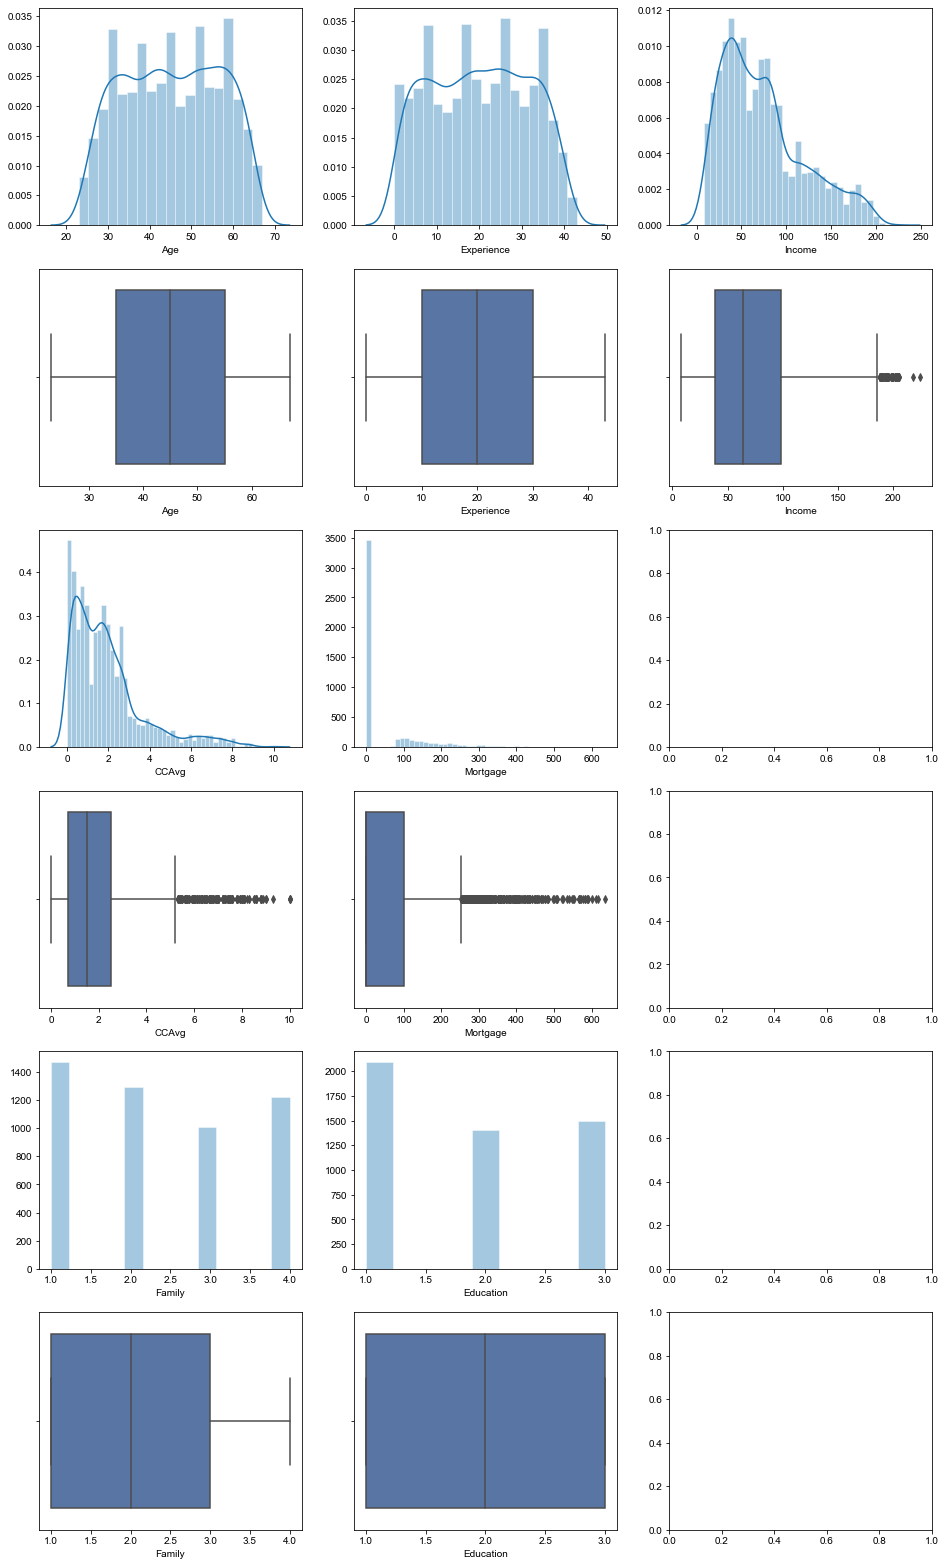

In [26]:
#univariate analysis Numeric data
f, axes = plt.subplots(6, 3,figsize=(16,28))
sns.set()
sns.boxplot(data_df['Age'],ax=axes[1,0])
sns.distplot(data_df['Age'],ax=axes[0,0])
sns.boxplot(data_df['Experience'],ax=axes[1,1])
sns.distplot(data_df['Experience'],ax=axes[0,1])
sns.boxplot(data_df['Income'],ax=axes[1,2])
sns.distplot(data_df['Income'],ax=axes[0,2])
sns.boxplot(data_df['CCAvg'],ax=axes[3,0])
sns.distplot(data_df['CCAvg'],ax=axes[2,0])
sns.boxplot(data_df['Mortgage'],ax=axes[3,1])
sns.distplot(data_df['Mortgage'],ax=axes[2,1],kde=False)
sns.boxplot(data_df['Family'],ax=axes[5,0])
sns.distplot(data_df['Family'],ax=axes[4,0],kde=False)
sns.boxplot(data_df['Education'],ax=axes[5,1])
sns.distplot(data_df['Education'],ax=axes[4,1],kde=False)

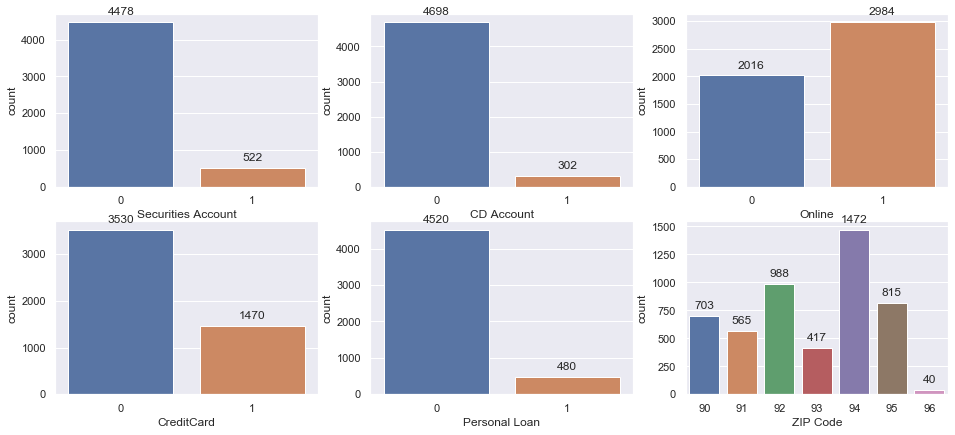

In [27]:
# univariate analysis : catagorical values
f, axes = plt.subplots(2, 3,figsize=(16,7))
splot=sns.countplot(data_df['Securities Account'],ax=axes[0,0])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot=sns.countplot(data_df['CD Account'],ax=axes[0,1])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot=sns.countplot(data_df['Online'],ax=axes[0,2])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot=sns.countplot(data_df['CreditCard'],ax=axes[1,0])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot=sns.countplot(data_df['Personal Loan'],ax=axes[1,1])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
splot=sns.countplot(data_df['ZIP Code'],ax=axes[1,2])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

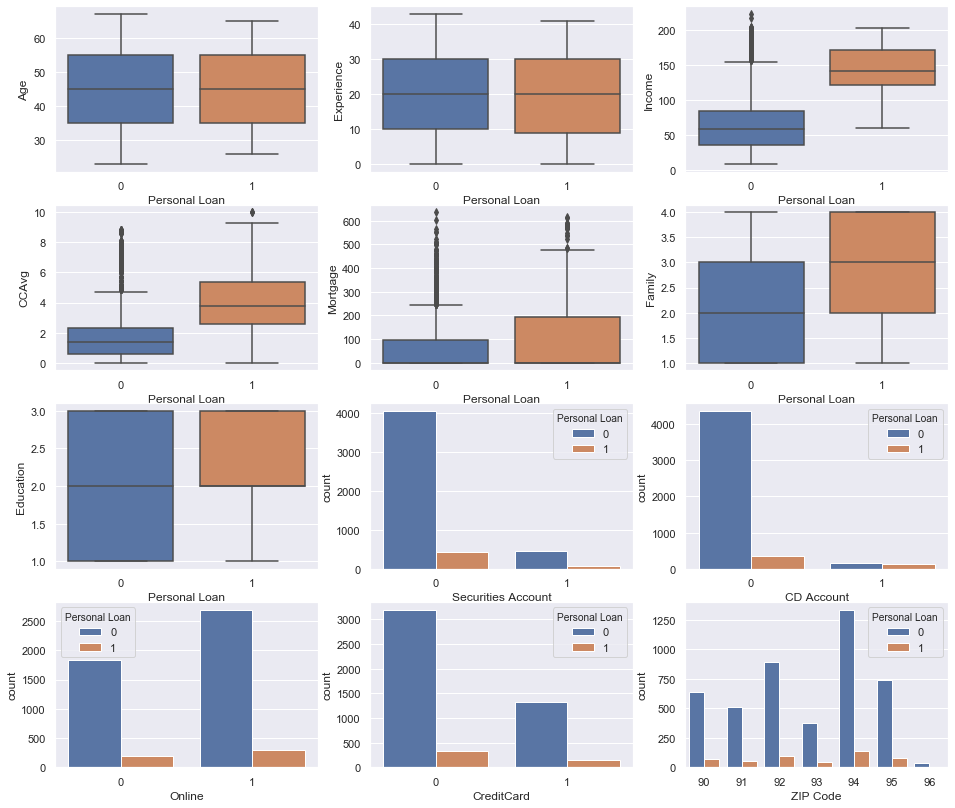

In [28]:
# Bivariate analysis 
f, axes = plt.subplots(4, 3,figsize=(16,14))
sns.boxplot( y= 'Age',x='Personal Loan', data=data_df,  orient='v',ax=axes[0,0])
sns.boxplot( y= 'Experience',x='Personal Loan', data=data_df,  orient='v',ax=axes[0,1])
sns.boxplot( y= 'Income',x='Personal Loan', data=data_df,  orient='v',ax=axes[0,2])
sns.boxplot( y= 'CCAvg',x='Personal Loan', data=data_df,  orient='v',ax=axes[1,0])
sns.boxplot( y= 'Mortgage',x='Personal Loan', data=data_df,  orient='v',ax=axes[1,1])
sns.boxplot( y= 'Family',x='Personal Loan', data=data_df,  orient='v',ax=axes[1,2])
sns.boxplot( y= 'Education',x='Personal Loan', data=data_df,  orient='v',ax=axes[2,0])
sns.countplot(data_df['Securities Account'],hue=data_df['Personal Loan'],ax=axes[2,1])
sns.countplot(data_df['CD Account'],hue=data_df['Personal Loan'],ax=axes[2,2])
sns.countplot(data_df['Online'],hue=data_df['Personal Loan'],ax=axes[3,0])
sns.countplot(data_df['CreditCard'],hue=data_df['Personal Loan'],ax=axes[3,1])
sns.countplot(data_df['ZIP Code'],hue=data_df['Personal Loan'],ax=axes[3,2])


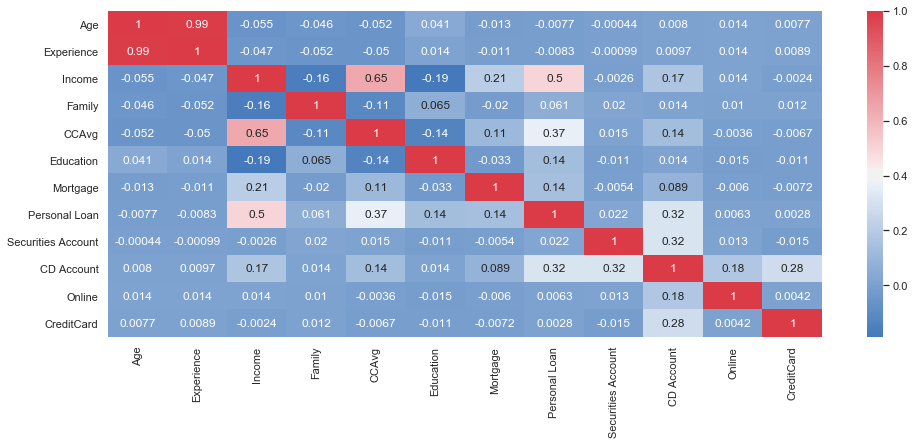

In [29]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.subplots(1, 1,figsize=(16,6))

sns.heatmap(data_df.corr(),cmap = cmap,annot=True)

In [30]:
data_df.drop(['Experience','ID'],inplace=True,axis=1) #drop colums

In [31]:
data_df.head() # check columns for change

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91,4,1.6,1,0,0,1,0,0,0
1,45,34,90,3,1.5,1,0,0,1,0,0,0
2,39,11,94,1,1.0,1,0,0,0,0,0,0
3,35,100,94,1,2.7,2,0,0,0,0,0,0
4,35,45,91,4,1.0,2,0,0,0,0,0,1


0    4520
1     480
Name: Personal Loan, dtype: int64

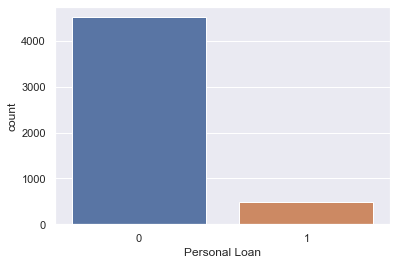

In [32]:
sns.countplot(data_df['Personal Loan']) # plot distribution of target
data_df['Personal Loan'].value_counts() # count the number of record

In [33]:
data_df['Intercept']=1 # added intercept columns
X=data_df.drop(['Personal Loan'],axis=1) # predictor channel
y=data_df['Personal Loan'] # dependent variable

In [34]:
X.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Intercept'],
      dtype='object')

In [35]:
X=pd.get_dummies(X)  # One hot coding for Zip code

In [36]:
X.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Intercept',
       'ZIP Code_90', 'ZIP Code_91', 'ZIP Code_92', 'ZIP Code_93',
       'ZIP Code_94', 'ZIP Code_95', 'ZIP Code_96'],
      dtype='object')

In [37]:
import statsmodels.api as sm # import stat model
logit_model=sm.Logit(y,X) 
result=logit_model.fit()# fit logistic model
print(result.summary())# summary of results

Optimization terminated successfully.
         Current function value: 0.128243
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4983
Method:                           MLE   Df Model:                           16
Date:                Sun, 03 Nov 2019   Pseudo R-squ.:                  0.5944
Time:                        14:03:58   Log-Likelihood:                -641.21
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0099      0.007      1.521      0.128      -0.003       0.023
Incom

In [38]:
X=X.drop(['Age','Mortgage','ZIP Code_90', 'ZIP Code_91', 'ZIP Code_92', 'ZIP Code_93',
       'ZIP Code_94', 'ZIP Code_95', 'ZIP Code_96'],axis=1)# drop perdicter channels as above
X.dtypes # chech for removal

Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Intercept               int64
dtype: object

In [39]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.128862
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4991
Method:                           MLE   Df Model:                            8
Date:                Sun, 03 Nov 2019   Pseudo R-squ.:                  0.5925
Time:                        14:03:59   Log-Likelihood:                -644.31
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Income                 0.0547      0.003     21.133      0.000       0.050       0.060
Famil

# Logistic regression Classifier

In [40]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [41]:
X.pop('Intercept') # drop the Intercept column
X.head() # check columns for removal (predictor variables)

,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,49,4,1.6,1,1,0,0,0
1,34,3,1.5,1,1,0,0,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,1


In [42]:
y.head() # Target variable

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1) # split data

In [44]:

log_reg_model=LogisticRegression(penalty='none',solver='newton-cg',random_state=1,class_weight='none') #set parameter
log_reg_model.fit(X_train,y_train) # fit model
y_train_predict=log_reg_model.predict(X_train) # predict train variable
print('=============Logistic Regression Prediction Model===========')
print('Accuracy of Train set : %0.3f'%(log_reg_model.score(X_train,y_train))) # score and print train set
y_test_predict=log_reg_model.predict(X_test) #predict test set
print('Accuracy of Test set : %0.3f'%(log_reg_model.score(X_test,y_test))) # score and print  test set
print ('\n====Classification report - Train set=====\n')
print(classification_report(y_train,y_train_predict)) # print classification reprot for train set
print ('\n=====Classification report - Test set====\n')
print(classification_report(y_test,y_test_predict)) # print classificatin
p_test,r_test,f_test,s_test=precision_recall_fscore_support(y_test,y_test_predict,labels=[1])

=============Logistic Regression Prediction Model===========
Accuracy of Train set : 0.952
Accuracy of Test set : 0.949

====Classification report - Train set=====

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3169
           1       0.82      0.64      0.72       331

    accuracy                           0.95      3500
   macro avg       0.89      0.81      0.85      3500
weighted avg       0.95      0.95      0.95      3500


=====Classification report - Test set====

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.60      0.70       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



In [45]:
temp=(np.append(X_train.columns,['Intercept'])) # temp data frame to hold coefficients names

In [46]:
cf=pd.DataFrame(np.append(log_reg_model.coef_,log_reg_model.intercept_),index=temp,columns=['Coefficient']) 

In [47]:
cf.transpose() # Table with all the coefficients

,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Intercept
Coefficient,0.053992,0.728166,0.164209,1.711953,-1.197536,3.905577,-0.635128,-1.189104,-13.466346


In [48]:
cf['%change in Odds']=cf.apply(lambda x : np.exp(x.Coefficient),axis=1) # calculate the change in odds of each variable

In [49]:
cf.sort_values(by='%change in Odds',ascending=False) # display the change in odds of each variable

,Coefficient,%change in Odds
CD Account,3.905577,49.678729
Education,1.711953,5.539771
Family,0.728166,2.071277
CCAvg,0.164209,1.178461
Income,0.053992,1.055476
Online,-0.635128,0.529868
CreditCard,-1.189104,0.304494
Securities Account,-1.197536,0.301937
Intercept,-13.466346,0.000001


# Naive Bayes Classifier

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train) # fit the model
y_train_predict_nb=nb_model.predict(X_train) # predict train set
print('=============Naive Bayes Classifier===========\n')
print ('Accuracy of Train set : %0.3f'%nb_model.score(X_train,y_train)) # score train set
print ('Accuracy of Test set : %0.3f\n'%nb_model.score(X_test,y_test)) # score test set
y_test_predict_nb=nb_model.predict(X_test) # predict test set
print('\n====Confusion matrix_Train Data====\n\n',confusion_matrix(y_train,y_train_predict_nb)) # train confusion matrix
print('\n====Confusion matrix_Test Data====\n\n',confusion_matrix(y_test,y_test_predict_nb))  # test confusion matrix
print ('====Classification report - Train set====\n')
print(classification_report(y_train,y_train_predict_nb)) # Classification report train data
print ('====Classification report - Test set====\n')
print(classification_report(y_test,y_test_predict_nb)) # Classification report test data
p_test_nb,r_test_nb,f_test_nb,s_test_nb=precision_recall_fscore_support(y_test,y_test_predict_nb,labels=[1])
print(f_test_nb)

=============Naive Bayes Classifier===========

Accuracy of Train set : 0.894
Accuracy of Test set : 0.887


====Confusion matrix_Train Data====

 [[2937  232]
 [ 138  193]]

====Confusion matrix_Test Data====

 [[1248  103]
 [  67   82]]
====Classification report - Train set====

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3169
           1       0.45      0.58      0.51       331

    accuracy                           0.89      3500
   macro avg       0.70      0.75      0.73      3500
weighted avg       0.91      0.89      0.90      3500

====Classification report - Test set====

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1351
           1       0.44      0.55      0.49       149

    accuracy                           0.89      1500
   macro avg       0.70      0.74      0.71      1500
weighted avg       0.90      0.89      0.89      1500

[0.49101796]


# KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [53]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train) # scale and transform train data
X_test_scaled=sc.fit_transform(X_test) # scale and transform test data

In [54]:
recall_train=[]
recall_test=[]
diff_recall=[]
fs_train=[]
fs_test=[]
diff_fs=[]
i=0
for j in range(1,50,2):     
    model_Knn=KNeighborsClassifier(n_neighbors=j,p=2)
    model_Knn.fit(X_train_scaled,y_train)
    y_train_predict_knn=model_Knn.predict(X_train_scaled)
    y_test_predict_knn=model_Knn.predict(X_test_scaled)
    p_train_knn,r_train_knn,f_train_knn,s_strain_knn=precision_recall_fscore_support(y_train,y_train_predict_knn,labels=[1])
    p_test_knn,r_test_knn,f_test_knn,s_test_knn=precision_recall_fscore_support(y_test,y_test_predict_knn,labels=[1])
    recall_train.append(r_train_knn[0])
    recall_test.append(r_test_knn[0])
    diff_recall.append(r_train_knn[0]-r_test_knn[0])
    fs_train.append(f_train_knn[0])
    fs_test.append(f_test_knn[0])
    diff_fs.append(f_train_knn[0]-f_test_knn[0])
    i=i+1
    


Text(0.5, 1.0, 'Optimized parameter for KNN Classifier')

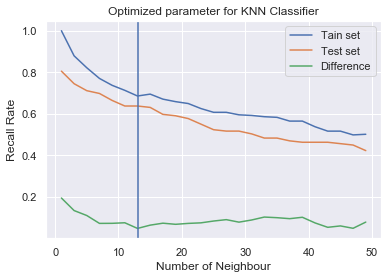

In [55]:
fig, ax = plt.subplots()
sns.lineplot(x=range(1,50,2),y=recall_train,label='Tain set')
sns.lineplot(x=range(1,50,2),y=recall_test,label='Test set')
sns.lineplot(x=range(1,50,2),y=diff_recall,label='Difference')
plt.axvline(x = 13)
ax.set_xlabel('Number of Neighbour')
ax.set_ylabel('Recall Rate')
ax.set_title('Optimized parameter for KNN Classifier')

Text(0.5, 1.0, 'Optimized parameter for KNN Classifier')

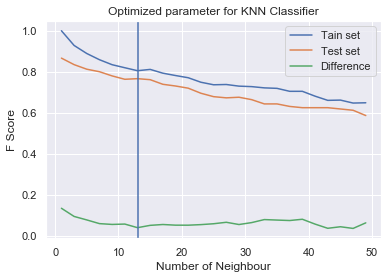

In [56]:
fig, ax = plt.subplots()
sns.lineplot(x=range(1,50,2),y=fs_train,label='Tain set')
sns.lineplot(x=range(1,50,2),y=fs_test,label='Test set')
sns.lineplot(x=range(1,50,2),y=diff_fs,label='Difference')
plt.axvline(x = 13)
ax.set_xlabel('Number of Neighbour')
ax.set_ylabel('F Score')
ax.set_title('Optimized parameter for KNN Classifier')

=>Optimized setting for K mean classifier is  n=13 which give a minimum recall difference(5%) between train and test sets at the same time resonably acceptable level accuracy of 64% for test data.Same setting hold for F score also.

In [57]:
model_Knn=KNeighborsClassifier(n_neighbors=13,p=2)
model_Knn.fit(X_train_scaled,y_train)
y_train_predict_knn=model_Knn.predict(X_train_scaled)
y_test_predict_knn=model_Knn.predict(X_test_scaled)
print('=============KNN Classifier===========\n')
print ('Accuracy of Train set : %0.3f'%model_Knn.score(X_train_scaled,y_train)) #train accuracy
print ('Accuracy of Test set : %0.3f'%model_Knn.score(X_test_scaled,y_test)) #test accuracy
print('\n====Confusion matrix_Train Data====\n\n',confusion_matrix(y_train,y_train_predict_knn)) # train confusion matrix
print('\n====Confusion matrix_Test Data====\n\n',confusion_matrix(y_test,y_test_predict_knn))  # test confusion matrix
print ('\n====Classification report - Train set====\n')
print(classification_report(y_train,y_train_predict_knn)) # train classification report
print ('\n====Classification report - Test set====\n')
print(classification_report(y_test,y_test_predict_knn)) # test classification report
p_test_knn,r_test_knn,f_test_knn,s_test_knn=precision_recall_fscore_support(y_test,y_test_predict_knn,labels=[1])

=============KNN Classifier===========

Accuracy of Train set : 0.969
Accuracy of Test set : 0.961

====Confusion matrix_Train Data====

 [[3163    6]
 [ 104  227]]

====Confusion matrix_Test Data====

 [[1347    4]
 [  54   95]]

====Classification report - Train set====

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3169
           1       0.97      0.69      0.80       331

    accuracy                           0.97      3500
   macro avg       0.97      0.84      0.89      3500
weighted avg       0.97      0.97      0.97      3500


====Classification report - Test set====

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       0.96      0.64      0.77       149

    accuracy                           0.96      1500
   macro avg       0.96      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [58]:
# Comparision of ther perfromance of all the three models
print('++++Recall score_Class 1++++\nLogistic regression \t\t: %0.2f\nNaive Bayes \t\t\t: %0.2f\nKNN Classifier \t\t\t: %0.2f'%(r_test,r_test_nb,r_test_knn))
print('\n++++Precision score_Class 1++++\nLogistic regression \t\t: %0.2f\nNaive Bayes \t\t\t: %0.2f\nKNN Classifier \t\t\t: %0.2f'%(p_test,p_test_nb,p_test_knn))
print('\n++++F score_Class 1++++\nLogistic regression \t\t: %0.2f\nNaive Bayes \t\t\t: %0.2f\nKNN Classifier \t\t\t: %0.2f'%(f_test,f_test_nb,f_test_knn))

++++Recall score_Class 1++++
Logistic regression 		: 0.60
Naive Bayes 			: 0.55
KNN Classifier 			: 0.64

++++Precision score_Class 1++++
Logistic regression 		: 0.84
Naive Bayes 			: 0.44
KNN Classifier 			: 0.96

++++F score_Class 1++++
Logistic regression 		: 0.70
Naive Bayes 			: 0.49
KNN Classifier 			: 0.77


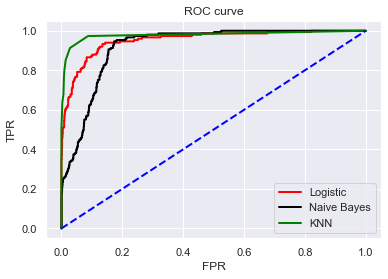

AUC for Logistic Regression model : 0.953
AUC for Naive Bayes model : 0.920
AUC for KNN model : 0.979


In [62]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
##Computing false and true positive rates
y_test_predict_prob=log_reg_model.predict_proba(X_test)
fpr, tpr,thres=roc_curve(y_test,y_test_predict_prob[:,1],drop_intermediate=False)
y_test_predict_nb_prob=nb_model.predict_proba(X_test)
fpr_nb, tpr_nb,thres_nb=roc_curve(y_test,y_test_predict_nb_prob[:,1],drop_intermediate=False)
y_test_predict_knn_prob=model_Knn.predict_proba(X_test_scaled)
fpr_knn, tpr_knn,threshold_knn=roc_curve(y_test,y_test_predict_knn_prob[:,1],drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='Logistic')
plt.plot(fpr_nb, tpr_nb, color='black',
 lw=2, label='Naive Bayes')
plt.plot(fpr_knn, tpr_knn, color='green',
 lw=2, label='KNN')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()
auc = roc_auc_score(y_test,y_test_predict_prob[:,1])
print('AUC for Logistic Regression model : %.3f' % auc)
auc = roc_auc_score(y_test,y_test_predict_nb_prob[:,1])
print('AUC for Naive Bayes model : %.3f' % auc)
auc = roc_auc_score(y_test,y_test_predict_knn_prob[:,1])
print('AUC for KNN model : %.3f' % auc)